In [92]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [93]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [104]:
def makeve():
    x = torch.randint(0,34,[4000])
    y = torch.randint(0,34,[4000])
    p = torch.randint(0,1,[4000])
    t, ind = torch.randint(0,3000,[10000]).sort()
    t = torch.unique(t)
    n_events = len(t)
    x, y, p = x[:n_events, None], y[:n_events, None], p[:n_events, None]

    events = torch.cat([x,y,t[:, None],p],dim=1)
    x_index, y_index, t_index, p_index = 0, 1, 2, 3
    print(events.shape)
    return events, n_events, x_index, y_index, t_index, p_index

In [36]:
import tonic

eventset = tonic.datasets.NMNIST(save_to='../Data/',
                                train=False,
                                transform=None)
loader = tonic.datasets.DataLoader(eventset, shuffle=True)

eventonic, target = next(iter(loader))
print(torch.squeeze(eventonic).shape, eventset.ordering)

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/
torch.Size([4627, 4]) xytp


# Parameters

In [97]:
sample_space = 1
sample_events = 1
sensor_size = [34,34]
N_p = 2
n_events = n_events
tau = torch.tensor(1500)

x_index, y_index, t_index, p_index = 0, 1, 2, 3

switch_id = [0,1,3,2]

# With simple loop from get_data()

In [29]:
%%timeit
c_int = lambda n, d : ((n - 1) // d) + 1

data = torch.zeros((c_int(sensor_size[0],sample_space),
                     c_int(sensor_size[1],sample_space),
                     N_p))

X = np.zeros((c_int(n_events, sample_events), len(torch.flatten(data))))
    #y = np.zeros((c_int(n_events, sample_events), ))
for i_event in range(1, n_events):
    data *= torch.exp(-(events[i_event,t_index]-events[i_event-1,t_index])/tau)

    x_pos = events[i_event,x_index]//sample_space
    y_pos = events[i_event,y_index]//sample_space
    p = events[i_event,p_index]
    data[int(x_pos), int(y_pos), int(p)] = 1.

    if i_event % sample_events == sample_events//2:
        X[i_event//sample_events, :] = torch.flatten(data)

399 ms ± 53.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [98]:
c_int = lambda n, d : ((n - 1) // d) + 1

data = torch.zeros((c_int(sensor_size[0],sample_space),
                     c_int(sensor_size[1],sample_space),
                     N_p))

X = np.zeros((c_int(n_events, sample_events), len(torch.flatten(data))))
    #y = np.zeros((c_int(n_events, sample_events), ))
for i_event in range(1, n_events):
    data *= torch.exp(-(events[i_event,t_index]-events[i_event-1,t_index])/tau)

    x_pos = events[i_event,x_index]//sample_space
    y_pos = events[i_event,y_index]//sample_space
    p = events[i_event,p_index]
    data[int(x_pos), int(y_pos), int(p)] = 1.

    if i_event % sample_events == sample_events//2:
        X[i_event//sample_events, :] = torch.flatten(data)

(2884, 2312) torch.Size([2884, 4])


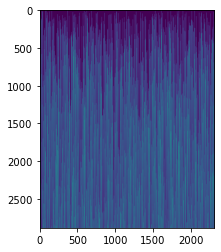

In [99]:
print(X.shape,events.shape)
plt.imshow(X)

In [112]:
events, n_events, x_index, y_index, t_index, p_index = makeve()
print(events[:,t_index])

torch.Size([2882, 4])
tensor([   0,    1,    2,  ..., 2997, 2998, 2999])


In [113]:
t = events[:,t_index].clone().detach()
events[:,2] = events[:,p_index]
events[:,3] = torch.arange(0,events.shape[0])
print(t, events)

tensor([   0,    1,    2,  ..., 2997, 2998, 2999]) tensor([[  14,    3,    0,    0],
        [  16,   15,    0,    1],
        [   6,   15,    0,    2],
        ...,
        [  30,    4,    0, 2879],
        [  27,   13,    0, 2880],
        [  21,   31,    0, 2881]])


torch.Size([2312, 2882])


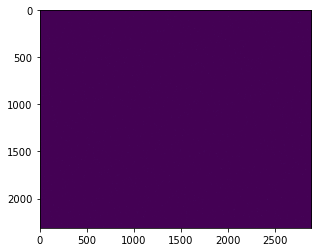

In [115]:
E = torch.ones(n_events)
R = torch.sparse.FloatTensor(events.T, E, torch.Size([34, 34, 2, n_events])).to_dense()
R = torch.flatten(R,0,2)
plt.imshow(R)
print(R.shape)

In [116]:
t_pos = 1000
A = torch.zeros([n_events,n_events])
T = torch.ones([t_pos,t_pos])
T = torch.triu(T)
print(T.shape)
A[-t_pos:,-t_pos:] = T

torch.Size([1000, 1000])


In [123]:
print(torch.matmul(A,t))

RuntimeError: expected scalar type Float but found Long

In [118]:
print(E.shape, torch.sum(R))

torch.Size([2882]) tensor(2882.)


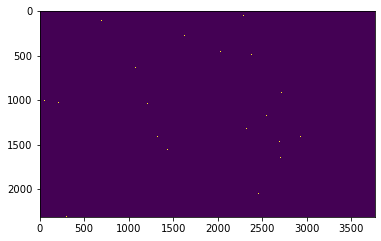

In [52]:
plt.imshow(R)

In [56]:
i = torch.LongTensor([[0, 1, 1],
                          [2, 0, 2]])
print(i.shape)
v = torch.FloatTensor([3, 4, 5])
torch.sparse.FloatTensor(i, v, torch.Size([2,3])).to_dense()

torch.Size([2, 3])


tensor([[0., 0., 3.],
        [4., 0., 5.]])

In [114]:
3762*2

7524

In [14]:
t = np.array([1,10,11,20,25,30,30])
t2 = np.array([1,1,10,11,20,25,30])

In [16]:
dt = t-t2
print(dt[:-1])

[0 9 1 9 5 5]


In [20]:
dt2 = dt[:-1]
s = np.exp(-dt2)
print(s)

[1.00000000e+00 1.23409804e-04 3.67879441e-01 1.23409804e-04
 6.73794700e-03 6.73794700e-03]


In [30]:
M,N = 6,6
t_pos = 3
a = np.ones([M-t_pos,N-t_pos])
a = np.triu(a)
b = np.zeros([t_pos,t_pos])
A = np.concatenate([b,b])
B = np.concatenate([b,a])
C = np.concatenate([A.T,B.T])
print(C)
#print(np.triu(a))

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1. 1.]]


In [31]:
C@dt2

array([ 0.,  0.,  0.,  9., 14., 19.])